<a href="https://colab.research.google.com/github/ElsieOtube/AI/blob/main/C_122461.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q
!pip install nltk -q
!pip install spacy -q
import nltk
!pip install sentence-transformers -q

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
stop = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer as Tf
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/LAB3.csv')
df.head()

,product,narrative
0,mortgages_and_loans,applied mortgage refinance understand process ...
1,debt_collection,received letter demanding payment medical debt...
2,debt_collection,car accident fault year old financial help use...
3,debt_collection,bad financial shape stemming bad employment si...
4,debt_collection,reliant capital solution repeatly call spouse ...


In [7]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
df['label'] = le.fit_transform(df['product'])
print(df.head())
print(df.shape)

               product                                          narrative  \
0  mortgages_and_loans  applied mortgage refinance understand process ...   
1      debt_collection  received letter demanding payment medical debt...   
2      debt_collection  car accident fault year old financial help use...   
3      debt_collection  bad financial shape stemming bad employment si...   
4      debt_collection  reliant capital solution repeatly call spouse ...   

   label  
0      2  
1      1  
2      1  
3      1  
4      1  
(71242, 3)


In [8]:
x= df['narrative']
y=df['label']
tf = Tf(ngram_range=(1,2), max_features=1000, stop_words='english')
x=tf.fit_transform(x.values.astype('U'))
x.shape

(71242, 1000)

In [9]:
print(y.shape)

(71242,)


In [11]:
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=95, max_depth=5, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

rf.fit(x_train, y_train)
pred= rf.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("rf accuracy:" , accuracy_score(y_test, pred))

rf accuracy: 0.7846866446768195


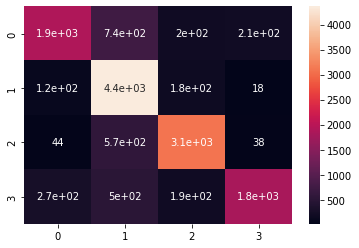

In [14]:
import seaborn as sea 
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sea.heatmap(cm, annot= True)
plt.show()

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.71      3039
           1       0.71      0.93      0.80      4677
           2       0.85      0.83      0.84      3745
           3       0.87      0.66      0.75      2788

    accuracy                           0.78     14249
   macro avg       0.81      0.76      0.77     14249
weighted avg       0.80      0.78      0.78     14249

